# Training Models

### Linear Regression

There are two performances measures. You can either define a utility function(or fitness function) that measures how good your model is, 
or you can define a cost function that measures how bad it is. For linear regression problems, people typically use a cost function that measures the distance between the linear model's predictions
and the training examples: the objective is to minimize this distance.

#### The Normal Equation

The closed-form-solution is a mathematical equation that gives the result direction

In [1]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 +3 * X + np.random.randn(100,1)

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.ylim(bottom = 0 , top = 14)
plt.show()


<Figure size 640x480 with 1 Axes>

To solve this for the theta that minimizes the cost function we use the inv() 
function from Numpy's Linear Algebra module to compute the X matrix inverse, and the dot() method for matrix multiplication:

In [3]:
X_b = np.c_[np.ones((100, 1)),X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best


array([[4.47746625],
       [2.61947656]])

Not bad if look at are y equation 4 + 3*X +np.random.randn(100,1) our first theta
our bias term is 4 and our slope is 3 with some noise added. So pretty good job by hand.
Lett's plot this model's predictions

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot((theta_best))
y_predict

array([[4.47746625],
       [9.71641936]])

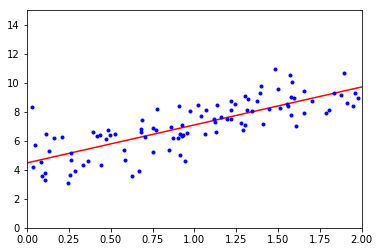

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [6]:
#Here is sk-learns method to do the same thing
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.47746625]), array([[2.61947656]]))

In [7]:
lin_reg.predict(X_new)

array([[4.47746625],
       [9.71641936]])

#### Computational Complexity

The Normal Equation computes the inverse of X.T dot(X), which is an n*n matrix where n is the number of features.The big O of inverting
such a matrix is typically about O(n^3). So if your double the features you increase computations time by 8

On the plus side the equation is linear with regards to the number of instances in the training set so after finding the weights or theta(s) your prediction are very fast

### Gradient Descent

The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize the cost function

To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter(theta).In other words you need to calculate how much the cost function will change if you change theta(j) just a little bit. aka taking the partial derivative. Below is an explaination of what is being done sans the math part

A way of thinking about this is you randomly pick a slope for your line (random initialization). You measure your error then you make a small adjustment. The important parameter in Gradient Descent is the size of the steps for the adjustment, determinemd by the learning rate of the hyperparameter. To increase this speed remember problems in you Numerical Analysis class.

If your learning rate is too small the iteration might take forever. If the are too big you might jump your valley. Plus not all cost function are shaped like bowls some might have irregular terrains making it difficult to find the global minimum vs a local minimum.

Fortunately, the MSE cost function for a Linear Regression model happens to be a 
convex function, which means that if you pick any two points on the curve the line segment joining them never crosses the curve. This implies that there are no local minima, just one global minimum. So the statement above does not apply to the MSE cost function

The MSE cost function is shaped like a bowl, but the bowl can be elongated if the features have a very different scale. So scaling is important. 
So always us Scikit-Learn's StandardScaler.

### Batch Gradient Descent

Instead of computing these partial derivatives individually the batch gradient uses the gradient vector, which contains all the partial derivatives of the cost function (one for each model parameter) and computes it for every instance in the model. Imagine a vector containing all the partial derivative ((#features by 1) vector) then mulitiply it to the transpose of the training matrix

In [8]:
eta = .1 # learning rate or steps
n_iterations= 10000
m = 100
theta = np.random.randn(2,1) # random intialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
theta

array([[4.47746625],
       [2.61947656]])

### Stochastic Gradient Descent

The Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance. This makes for a faster algorithm but it causes it to jump around. This can be a good thing if the cost function is not "bowl" shaped but rather irregular because it can help the algorithm jump out of local minimuns to find the global minimum. 

This jumping around also causes it to never settle at a minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large, then get smaller and smaller allowing the algorithm to settle at the global minimum. The function that determines the learning rate at each iteration is called the learning schedule. 

If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

In [9]:
# This code implements Stochastic Gradient Descent 
# using a simple learning schedule
n_epochs = 50
t0, t1, =  5, 50  # learining schedule hyperparameters
m = 100
def learning_schedule(t):
    return t0/ (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index +1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*100 +i)
        theta = theta - eta*gradients
    

In [10]:
theta

array([[4.44770499],
       [2.6085676 ]])

In [11]:
#sklearn's version
from sklearn.linear_model  import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 50, penalty = None, eta0 =0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.48913468]), array([2.646904]))

### Mini-batch Gradient Descent

Instead of just one or all of the instances Mini -batch computes the gradients on a small random set of instances. There is a trade of for speed because the Mini batch GD can get caught in a local minimum but it will end up walking around a bit closer to the minimum than the Stochastic approach. The Batch GD's path actually stops at the minimum while both Stochastic and Mini-batch continue to walk around it.

Final note there is almost no difference after training: all these algorithms end up with very similar models and make predictions in exactly the same way 

## Polynomial Regression

What if your data is actually more complex than a simple straight line? Surprisingly, you can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

In [12]:
# example by generating some nonlinear data, 
# base on a simple quadratic equation
m = 100
X = 6* np.random.rand(m, 1)- 3
y = 0.5 * X**2 + X +2 +np.random.randn(m,1)

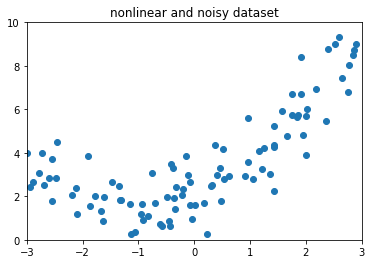

In [13]:
plt.scatter(X, y)
plt.axis([-3, 3, 0, 10])
plt.title("nonlinear and noisy dataset")
plt.show()

Clearly a straight line will never fit this data. We will use sklearn's PolynomialFeatures class. Since there is only one curve we know it is quadratic in shape and we will set degree parameter to 2. Then we will transform our training data which will add the square of each feature in the training set as new features

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X[0], X_poly[0])

[-0.3387071] [-0.3387071  0.1147225]


As you can see X_poly contains the original and the squared value. Now you can fit a LinearRegression model

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_ 


(array([2.03396231]), array([[1.00116577, 0.49203969]]))

Remember that this lin_regression model now takes two features, so if you pass it the one feature you have it won't work. Your choice is to use the Polynomial Features fit_transform method on all future data or just pull out the equation and use it to predict.

The PolynomialFeatures finds the relationship between features which linear regression does not. A second degree on two features(a,b) would add the square of the two features but also ab. The third degree would add the square and the cubed and also ab, a^2b, ab^2.
PolynomialFeatures(degree = d) transforms an array containing n features into an array containing (n+d)!/d!n! feature. Beware of the combinatorial explosion of the number of features

## Learning Curves

Learning curves is another way to see if you are under or over fitting your data. Before you used cross-validation to get an estimate of the model's generalization  performance. If a model preform well on the training data but generalizes poorly according to the cross validation metrics then your model is overfitting. If you preform poorly on both then it is underfitting.

Learning curves are plots of the models performance on the training set and the validation set as a function of the training set size or the training iteration.

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m]) # notice your fitting to a bigger and bigger set
        y_train_predict = model.predict(X_train[:m]) # notice you are predict on a bigger and bigger set
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 2, label = "val")
    plt.ylim(top = 8, bottom = 0)
  

Let's look at the learning curves of the plain Linear Regression model

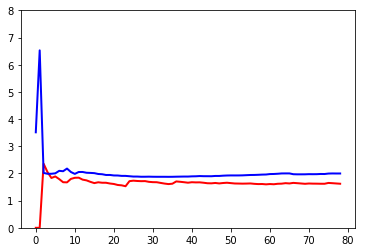

In [17]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y) # remember this it the quadratic equation and we are 
                                    # plotting the error with respect to training set size

So what is this telling us. The red line is the training set. When the training set is very small it can predict with little error but as the train set gets larger the mean error grows. This is because we used a linear model on a quadratic function. Now look at the blue line this is your test set, this proforms poorly with a little training set but converges to the same error rate with larger training set. This is an example of underfitting. Both curves have reached a plateau, they are close and fairly high. If your model is underfitting adding more training examples will not help. You need a more complex model or need to add features(feature engineering). Learning curves can help you see if your degree in your polynomialfeature is high enough

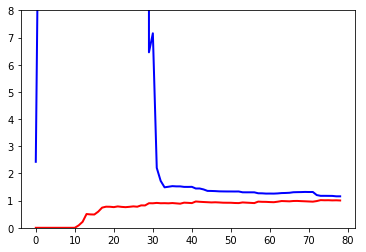

In [18]:
#looking at an example of a 10th- degree polynomial model on the same data
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
    ("lin_reg", LinearRegression()), 
])

plot_learning_curves(polynomial_regression, X, y)

Here we definitely created an overfitting model. But as we can see, adding to our training set, our errors converged. So we have figured out one way to correct an overfitted model, add to the training set till the validation error converges to the training error

A model's generalization error can be express as the sum of three very different errors:

    1. Bias- This error is due to wrong assumptions such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data
    2. Variance- This is due to the model's excessive sensitivity to small variations in the training data. A model with many degrees of freedom is likely to have high variance and thus to overfit the training data.
    3. Irreducible error- This is due to the noisiness of the data itself.The only way to reduce this part of the error is to clean up the data(e.g.fix the data sources such as brokem sensors, or detect and remove outliers)

Increasing a models complexity will typically increase its variance and reduce its bias. Conversely, reducing a model's complexity increases its bias and reduces its variance.

## Regularized Linear Models

A good way to reduce overfitting is to regularize the model. The fewer degrees of freedom it has the harder it will be for it to overfit the data. For a linear model, regularization is typically achieved by constraining the weights of the model. Next we will look at three models which implement three different ways to constrain the weights.

### Ridge Regression

Ridge Regression is a regularized version of Linear Regression. $\alpha$$\sum_{i=1}^{n}$$\theta^{2}$ is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. This term should only added to the cost function during training. Once the model is trained, you want to evaluate the model's performance using the unregularized performance measure 

The hyperparameter $\alpha$ controls how much you want to regularize the model. If $\alpha$ = 0 then Ridge Regression is just Linear Regression. If $\alpha$ is very large, then all weights end up very close to zero and the result is a flat line going through the data's mean. 

Equation Ridge Regression cost function:
    J($\theta$) = MSE($\theta$) + $\alpha$$\frac{1}{2}$$\sum_{i=1}^{2}$$\theta^2$

Note that the bias term $\theta_{0}$ is not regularized. If we define the w as a vector of feature weights, then the regularization term is equal to the $\frac{1}{2}$(||w||$_{2}$)$^2$ where ||.|| represents the l$_{2}$ norm  of the weight vector. Remember that the norm is just the square root the of the squared terms. Think magnitude of a vector.

It is important to scale the data(StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

Ridge Regression closed-form solution
$\hat{\theta}$ = (X$^{T}$$\cdot$A + $\alpha$A)$^{-1}$$\cdot$X$^{T}$$\cdot$y

In [19]:
# sklearn using a closed form solution
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver= "cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])
# f(1.5) =.5x^2 +x +2 = 4.625

array([[4.8601001]])

In [20]:
# compared to Stochastic Gradient Descent
sgd_reg = SGDRegressor(penalty="l2", max_iter = 5, tol = None)# penalty sets the type of 
                                    # regularization term to the use
                                    # l2 is equal to half the 
                                    # square of the l2 norm
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])
       

array([4.03359945])

Using the PolynomialFeatures(degree= 10) first than scaling the data before finally using the Ridge algorithm can flatten the curves produced when using the Polynomial feature. 

In [21]:
x1 = np.array([[.1,.35,.36, .37, .4, .5, .7, 1, 1.4, 1.7, 1.9, 2.4, 2.7, 3, 3.3, 3.8 ,4]])
y1 = np.array([[ 0, 2, .4, 0 ,4, 2, 5, 8, 7, 6, 3, 5, 7, 4, 6, 8, 10 ]])


alpha1 = [0, .25 , 5]

In [22]:
poly_features = PolynomialFeatures(degree = 10, include_bias = False)
x1_poly = poly_features.fit_transform(x1.reshape(-1,1))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1_poly_scaled = scaler.fit_transform(x1_poly)
x1_poly_scaled.shape

(17, 10)

Now we will plot the poly_scaled X1 with different values of alpha. Remember alpha = 0 will not change the graph but the higher values of alpha help to flatten the graphs by decreasing the sensitivity of the variances

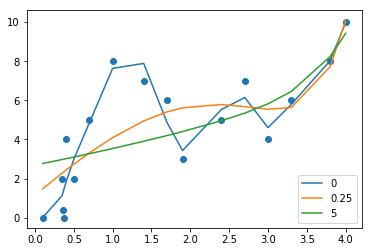

In [23]:
plt.scatter(x1,y1)    

for a in alpha1:
    ridge_reg = Ridge(alpha = a, solver = "cholesky")
    ridge_reg.fit(x1_poly_scaled, y1.reshape(17,1))
    yval = ridge_reg.predict(x1_poly_scaled)
    plt.plot(x1.reshape(17,1), yval, label = a)
plt.legend(loc= "lower right")

### Lasso Regression 
#### Least Absolute Shrinkage and Selection Operator Regression

This regularized version of Linear Regression is just like Ridge Regression but it add the ${l}_{1}$ norm. Remember that this is sum of the magnitudes of the individual vectors in a space. Here it would just be the features themselves.

Lasso Regression cost function
    J($\theta$) = MSE($\theta$) + $\alpha$$\sum_{i=1}^{n}$|$\theta$|

An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features. In other words, Lasso Regression automatically performs feature selection and oupt puts a sparse model if alpha is set high enough.

In [24]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = .1)
lasso_reg.fit(X,y) # the first quadratic equation
lasso_reg.predict([[1.5]])


array([4.81080848])

In [25]:
sgd_reg = SGDRegressor(penalty = "l1",max_iter = 5, tol = None )
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.02219853])

### Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso's regularization terms that you can control with the mix ratio r. When r = 0 Elastic Net is equivalent to Ridge Regression and when r=1, it is equivalent to Lasso Regression

Okay so when do you use plain linear Regression(i.e., without any regularization), Ridge, lasso or Elastic Net? It is almost always preferable to have a least a little bit of reguarization. So Ridge is good default, but if you suspect that only a few features are actually useful you should prefer Lasso or Elastic Net since they tend to reduce the useless features' weights down to zero. Generally Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated

In [26]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=.1, l1_ratio= .5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])
    

array([4.81188152])

### Early Stopping 

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. Be careful with early stopping on Stochastic and Mini-batch Gradient Descents because the curves are not smooth and it is hard to know whether you have reached the minimum or not. 

In [27]:
from sklearn.base import clone
# prepare the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .2)
   
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 90, include_bias= False)),
    ('std_scaler', StandardScaler())])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)


In [28]:
sgd_reg = SGDRegressor(max_iter = 1000,  tol = None, warm_start = True, penalty = None, 
                      learning_rate = "constant", eta0= .0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error< minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model= clone(sgd_reg)
    

In [29]:
best_model.fit(X_train, y_train.ravel())
best_model.predict([[1.5]])

array([4.9322912])

## Logistic Regression

Some regression algorithms can be used for classification as well.(and vice versa). Logistic Regression is commonly used to estimate the probability that an instance belongs to a particular class. If the estimated probability is greater than 50% then the model predicts that the instance belongs to that class(called the positive class , labeled "1"), or else it predicts that it does not(called the negative class, labeled "0"). This makes it a binary classifier. 

### Estimating Probabilities

Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directley like the Linear Regression model does it outputs the logistic of the result. Realize this is not regression.

Logistic Regression model estimated probablilty(vectorized form)

$\hat{p}$ = $\sigma$($\theta^{T}$$\cdot$x)

The logistic function is a sigmoid function(i.e., S-shaped) that outputs a number between 0 and 1. 

Logistic function

$\sigma$(${t}$) = $\frac{1}{1 + exp(-t)}$

Once the Logistic Regression model has estimated the probability $\hat{p}$ = $h_{\theta}$(x) that an instance x belongs to the positive class, it can make its predictions $\hat{y}$ easily.

$$
\hat{y}=
\begin{cases}
0 & \text{if } \hat{p} < 0.5 \\
1 & \text{if } \hat{p} > 0.5
\end{cases}
$$



Notice tha $\sigma$ (t) < .05 when t< 0 and $\sigma$(t)>=.5 when t>= 0, so a Logistic Regression model predicts 1 if $\theta^{T}$$\cdot$ x is positive, and 0 if it is negative.  Your weights ($\theta$'s) are created so this happens. 

### Training and Cost Function

The objective of training is to set the paramenter vector $\theta$ so that the model estimates high probabilities for positive instancs and low probabilities for negative instances. This idea is captured by the cost function shown below for a single training instance x.


$$
c(\theta) =
\begin{cases}
-log(\hat{p}) & \text{if y = 1}\\
-log(1 - \hat{p})  &  \text{if y= 0}
\end{cases}
$$

This cost fuction makes sense because - log(t) grows very large when t approaches 0 and approaches 0 when t is close to 1

The bad news is that there is no known closed-form equation to compute the values of $\theta$ that minimizes this cost function. But the good news is that this cost function is convex, so Gradient Descent (or any other optimaization algorithm) is guaranteed to find the global minimum. The partial derivative of the cost function with regards to $j^{th}$ model parameter $\theta_{j}$ is given below

$\frac{\partial}{\partial\theta}$ = $\frac{1}{m}$$\sum_{i=1}^{m}$ ( $\sigma$($\theta^{T}$$\cdot$$x^{(i)}$) - $y^{i})$$x_{j}^{(i)}$

Once you have the gradient vector containing all the partial derivatives you can use it in the Batch Gradient Descent algorithm. That's it now you can train your own Logistic Regession model. Or use sklearn.

### Decision Boundaries

In [30]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

Let's create a training set of just petal widths. Then we will create a binary target group of 1's that equal Iris Virginica or 0's for everything else

In [31]:
X =iris["data"][:, 3:]# one column of just petal width

In [32]:
y = (iris["target"] == 2).astype(np.int) # 1 if Iris Virginica, else 0

In [33]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = "lbfgs")
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Let's look at the model's estimated probabilities for flowers with petal widths varying from 0 to 3 cm. We will use numpy's linspace to return an array with between the range 0 to 3 divided by 1000. Below it the numpy doc 


numpy.linspace(start, stop, num = 50, endpoint = True, retstep = False, dtype = None) : Returns number spaces evenly w.r.t interval. Similiar to arange but instead of step it uses sample number

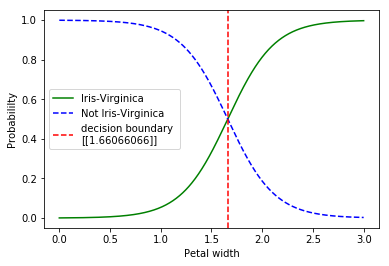

In [34]:
X_new = np.linspace(0,3,1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-",label= "Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label= "Not Iris-Virginica")

plt.xlabel("Petal width")
plt.ylabel("Probabililty")
idx = np.argwhere(y_proba[:, 0] <= y_proba[:,1])
value = X_new[idx[0]]
plt.axvline(x = X_new[idx[0]], color = "r", linestyle = "--", label = "decision boundary \n"+ str(value))
plt.legend(loc = "center left")
plt.show()



In [35]:
indv = np.argwhere(y == 1)
indo = np.argwhere(y == 0)
minimum_widthv = X[indv].min()
maximum_widthv = X[indv].max()
minimum_widtho = X[indo].min()
maximum_widtho = X[indo].max()
print(minimum_widthv, maximum_widthv, minimum_widtho, maximum_widtho )

1.4 2.5 0.1 1.8


The petal width of the Iris Virginica flowers ranges for 1.4 to 2.5 cm, while the others range from .1 to 1.8. The decision boundary is 1.66 lets at some percents around this mark

In [36]:
percent_virginica_above =len(np.argwhere(X[indv] >= 1.66))/len(X[indv])
percent_other_above =len(np.argwhere(X[indo] >= 1.66))/len(X[indo])
percent_other_below = len(np.where(np.logical_and(X[indo]>=1.4, X[indo]<1.66)))/len(X[indo])
percent_virg_below = len(np.where(np.logical_and(X[indv]>=1.4, X[indv]<1.66)))/len(X[indv])

In [37]:
print(percent_virginica_above, percent_other_above)
print(percent_virg_below, percent_other_below)

0.92 0.02
0.06 0.03


Now notice that the graph was of the probability. If we had used the predict method anything with a probability higher than .5 would be classified as a virginica and below .5 would be classified not a virginica

In [38]:
log_reg.predict([[1.661], [1.66]])

array([1, 0])

In [39]:
#Let's train the log_reg on two features
x_train = iris["data"][:, 2:]
log_reg.fit(x_train, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Text(0, 0.5, 'Petal Width')

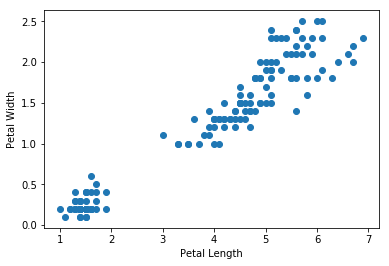

In [40]:
y_proba2 = log_reg.predict_proba(x_train)
plt.scatter(x_train[:, 0], x_train[:, 1])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")


In [41]:
y_predict = log_reg.predict(x_train)
results =np.c_[x_train, y_predict]
result_vir = np.argwhere(results[:,2] == 1)
result_non = np.argwhere(results[:,2] == 0)

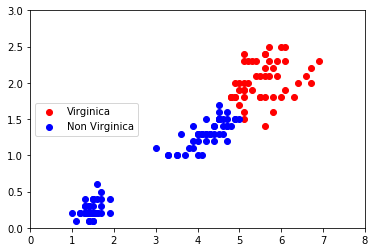

In [42]:
indv =result_vir.ravel()
indn = result_non.ravel()
virginica= x_train[indv]
lenth = len(virginica)
non_virginica = x_train[indn]
X_train = np.concatenate((virginica, non_virginica), axis = 0)
plt.figure()
plt.scatter(X_train[:lenth, 0], X_train[:lenth,1], color= "red", label = "Virginica")
plt.scatter(X_train[lenth:,0], X_train[lenth:,1], color = "blue", label  = "Non Virginica")
plt.xlim(right = 8.0, left =0.0)
plt.ylim(top=3, bottom = 0)
plt.legend(loc=6)
plt.show()


Just like the other linear models, Logistic Regression models can be regularized using $l_{1}$ or $l_{2}$ penaltites. Scikit-Learn actually adds and $l_{2}$ penalty by default

### Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers.
This is called Softmax Regression or Multinomial Logistic Regression. 

When given an instance x, the Softmax Regression nodel first computes a score $s_{k}(x)$ for each class k, then estimates the probabilty of each class by applying the softmax function to the scores. 

The equation to compute $s_{k}$

$s_{k}(x)$ = $(\theta^{(k)})^{T}$$\cdot$x

Note tht each class has its own dedicated parameter vector $\theta_{k}$, typically stored as rows in a parameter matrix. Once you have computed the score of every class for the instance x, you can estimate the probability $\hat{p}_{k}$ that the instance belongs to class k by running the scores through the softmax function

In [ ]:
$\hat{p}_k$ = $\sigma$(s(x))$_{k}$ = $\frac{esp(s_{k}(x))}{\sum_{j=1}^{K} exp(s_{j}(x))}$

 K is the number of classes 
    
 s(x) is a vector containing the scores of each class for the instance x

 $\sigma$(s(x))$_{k}$ is the estimated probability that the instance x belongs to k gven the scores of each class for that instance

Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with the hightest estimated probability(which is simply the class with the highest score)

Softmax Regression classifier prediction:
    
$\hat{y}$ = argmax(k)(($\theta^{(k)})^{T}$ $\cdot$ x)

The argmax operator returns the value of a varibale that maximizes a function. In this equation, it returns the value of k that maximizes the estimated probability

#### Training the Softmax

The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes). Minimizing this cost function is called cross entropy. Cross entropy penalizeds the model when it estimates a low probability for a target class. Cross entropy is frequently used to measure how well a set of estimated class probabilities match the classes(which will be used in future chapters 

J($\Theta$) = -$\frac{1}{m}$$\sum_{i=1}^{m}$$\sum_{k=1}^{K}$$y_{k}^{(i)}$log($\hat{p}_{k}^{(i)}$)

$y_{k}^{(i)}$ is equal to 1 if the target class for the i$^{th}$ instance is k: otherwise, it is equal to 0

Notice that when there are just two classes (K = 2), this cost function is equivalent to the Logistic Regression's cost function

In [ ]:
The gradient vector of this cost functin with regards to $\theta^{(k)}$ 

$\nabla_{\theta}{k}$ J($\Theta$) = $\frac{1}{m}$$\sum_{i=1}^{m}$($\hat{p}_{k}^{(i)}$ - $y_{k}^{(i)}$)x$^{(i)}$

Now you can compute the gradient vector for every class, then use Gradient Descent( or any other optimization algorithm) to find the  parameter matrix $\Theta$ that minimizes the cost function

Let's use Softmax Regression to classify the iris flowers into all three classes. Scikit learn's Logistic Regression uses one verses all by default when you train it on more than two classes, but you can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression. You must also specify a sovler that supports Softmax Regression, we will use "lbfgs" solver. (see Scikit-Learn's documentation). It also applies $l_{2}$ regularization by default, which you can control using the hyperparameter C. (book states this control for $l_{2}$ but this needs to be investigated further)

In [44]:
X = iris["data"][:, (2,3)]#petal length/witdth, also notice the tuple for np arrays
y = iris["target"]

In [47]:
softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs" , C =10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

So with this code you now can predict an iris with 5 cm long and 2 cm wide. The predict method will return the array column from the target. The predict_proba method will show you all probabiliies for each class in the target.

In [48]:
softmax_reg.predict([[5,2]])

array([2])

In [49]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])